In [1]:
import re
import json
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

# Set iPython to display visualization inline
%matplotlib inline

In [94]:
tweets_data_path = '../data/twitter_data_zika.txt'

tweets_data_full = []
tweets_file = open(tweets_data_path, "r")


for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data_full.append(tweet)
    except:
        pass 

print("This document contains %d tweets.\n" %(len(tweets_data_full)))

print(len(tweets_data_full))
#print(tweets_data_full)

This document contains 11939 tweets.

11939


In [95]:
# Problem tweet!
tmpTwt = tweets_data[6524]
print(tmpTwt)

{'limit': {'timestamp_ms': '1466729466024', 'track': 3}}


In [102]:
geolocator = Nominatim()

user_ID         = [(T['user']['id'] if 'user' in T else None) for T in tweets_data_full]
user_userName   = [(T['user']['screen_name'] if 'user' in T else None) for T in tweets_data_full]
user_screenName = [(T['user']['name'] if 'user' in T else None) for T in tweets_data_full]
#tweet_location  = [(T['place']['full_name'] if 'place' in T else None) for T in tweets_data_full]
#tweet_locGeo    = [(geolocator.geocode(T['place']['full_name']) if 'place in T else None) for T in tweets_data_full]
#tweet_loc_lats  = [(tweet_locGeo.latitude if 'place' in T else None) for T in tweets_data_full]
#tweet_loc_lons  = [(tweet_locGeo.longitude if 'place' in T else None) for T in tweets_data_full]
#tweet_country   = [(T['place']['country_code'] if 'place' in T else None) for T in tweets_data_full]
#geo_lats        = [(T['geo']['coordinates'][0] if 'geo' in T else None) for T in tweets_data_full]
#geo_lons        = [(T['geo']['coordinates'][1] if 'geo' in T else None) for T in tweets_data_full]
tweet_time      = [(T['created_at'] if 'created_at' in T else None) for T in tweets_data_full]
tweet_lang      = [(T['lang'] if 'lang' in T else None) for T in tweets_data_full]
text            = [(T['text'] if 'text' in T else None) for T in tweets_data_full]
in_reply_to_screen_name = [(T['in_reply_to_screen_name'] if 'in_reply_to_screen_name' in T else None) for T in tweets_data_full]


tweets_full_dataframe = pd.DataFrame({'userID':user_ID, 'userName':user_userName, 'userScreenName':user_screenName,
                                      #'tweet_location':tweet_location,'user_lats':tweet_loc_lats,'user_lons':tweet_loc_lons,
                                      #'tweet_country':tweet_country, 'geo_lats':geo_lats,'geo_lons':geo_lons,
                                      'tweet_time':tweet_time,'tweet_lang':tweet_lang,'text':text,
                                      'reply_to_ScreenName':in_reply_to_screen_name})

# dataframe with all column names:
#tweets_full_dataframe = pd.DataFrame({'userID':user_ID, 'userName':user_userName, 'userScreenName':user_screenName,
#                                      'tweet_location':tweet_location,'user_lats':tweet_loc_lats,'user_lons':tweet_loc_lons,
#                                      'tweet_country':tweet_country,'geo_lats':geo_lats,'geo_lons':geo_lons,
#                                      'tweet_time':tweet_time,'tweet_lang':tweet_lang,'text':text,
#                                      'reply_to_ScreenName':in_reply_to_screen_name})

In [103]:
tweets_full_dataframe.tail(10)

,reply_to_ScreenName,text,tweet_lang,tweet_time,userID,userName,userScreenName
11929,None,"Ginecologista em Sete Lagoas, Avaliacao, detec...",pt,Fri Jun 24 03:26:18 +0000 2016,4.865169e+09,sete1lagoas6,Sete Lagoas - GIN
11930,None,RT @_juliannemoore: Gun violence claims 91 Ame...,en,Fri Jun 24 03:26:19 +0000 2016,3.512243e+08,Julia_Stirling,Julia
11931,None,My happy virus 💕😙\n\nCan't wait to see you soo...,en,Fri Jun 24 03:26:21 +0000 2016,8.057311e+07,Weonnni,wenny huang
11932,None,Previous exposure to dengue may make Zika wors...,en,Fri Jun 24 03:26:25 +0000 2016,7.209561e+17,JonesCarter65,Jones Carter
11933,None,Brazilian man with Zika virus develops severe ...,ht,Fri Jun 24 03:26:25 +0000 2016,2.955857e+09,ValBenRemedies,ValBen Remedies
11934,None,RT @lmjxgaga: se vc eh da minha escola saiba q...,pt,Fri Jun 24 03:26:26 +0000 2016,2.186425e+09,cabellomovin,irys
11935,yanderekat23,@yanderekat23 virus removed it...but even thou...,en,Fri Jun 24 03:26:28 +0000 2016,4.315990e+09,Enept1,Ze'npaul Pacheco
11936,None,"O mulek é zika demaaais. Salve, Sangueee!!!!! ...",pt,Fri Jun 24 03:26:29 +0000 2016,5.152199e+07,cbscoutinho,Caio Coutinho
11937,None,Científicos descubrieron anticuerpos capaces d...,es,Fri Jun 24 03:26:30 +0000 2016,9.401643e+07,wonderisaura,Zulay Mercado
11938,None,Alerta: Confirman el primer caso del Virus Zik...,es,Fri Jun 24 03:26:32 +0000 2016,7.454620e+17,hugodia02333863,hugodiaz


In [106]:
# Finding unique values

uniqueID       = tweets_full_dataframe.userID.unique()
#uniqueLocation = tweets_full_dataframe.tweet_location.unique()
uniqueLanguage = tweets_full_dataframe.tweet_lang.unique()

print("There are %d tweets in this dataframe, but only %d unique users." %(len(tweets_full_dataframe), len(uniqueID)))
print("Of the %d unique users, there are %d different languages represented." %(len(uniqueID), len(uniqueLanguage)))
#print("Of the %d unique users, %d listed a self-reported location." %(len(uniqueID), len(uniqueLocation)))

There are 11939 tweets in this dataframe, but only 9755 unique users.
Of the 9755 unique users, there are 36 different languages represented.


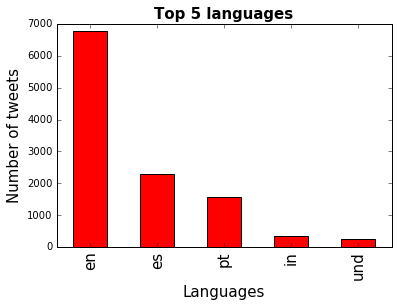

In [107]:
# Plotting the top 5 languages

tweets_by_lang = tweets_full_dataframe['tweet_lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [ ]:
# Map out the tweet location by direct Lat Lon

# Use the Gall–Peters projection
map = Basemap(projection='gall', 
              resolution = 'l', 
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define longitude and latitude points
x,y = map(tweets_full_dataframe['geo_lons'].values, tweets_full_dataframe['geo_lats'].values)

# Plot using round, red markers, size 6
map.plot(x, y, 'ro', markersize=6)

# Show the map
plt.show()